In [1]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()
import cv2
from matplotlib import pyplot as plt
import numpy as np
import torch
import imutils


Ultralytics 8.3.23  Python-3.10.11 torch-2.5.0+cpu CPU (AMD Ryzen 7 3700U with Radeon Vega Mobile Gfx)
Setup complete  (8 CPUs, 5.9 GB RAM, 454.0/476.1 GB disk)


In [2]:
model = YOLO("../models/sudoku_bound_detector.pt",)
model

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_runni

In [167]:
predictions = model.predict(source="../assets/sudoku2.jpg")
# print(model.predict)


image 1/1 c:\Users\ANDER\Documents\Tpicos Selectos en IA\sudoku-solver-topics-final\segmentation\..\assets\sudoku2.jpg: 640x512 1 sudoku-GoHx, 299.0ms
Speed: 8.0ms preprocess, 299.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


In [168]:
print(predictions)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'sudoku-GoHx'}
obb: None
orig_img: array([[[  2,   0,   0],
        [ 22,  20,  19],
        [ 22,  18,  17],
        ...,
        [145, 167, 179],
        [152, 167, 176],
        [  0,   0,   7]],

       [[  2,   0,   0],
        [ 19,  17,  16],
        [ 13,   9,   8],
        ...,
        [148, 167, 180],
        [152, 167, 176],
        [  0,   0,   7]],

       [[  2,   0,   0],
        [ 12,  10,   9],
        [  9,   5,   4],
        ...,
        [147, 166, 179],
        [152, 167, 176],
        [  0,   0,   7]],

       ...,

       [[  5,   0,   0],
        [ 29,  24,  21],
        [ 30,  26,  21],
        ...,
        [ 20,  39,  96],
        [ 27,  39,  79],
        [  0,   0,  24]],

       [[  5,   0,   0],
        [ 33,  28,  25],
        [ 35,  30,  27],
        ...,
        [ 17,  34,  91

In [169]:
print(predictions[0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9977])
data: tensor([[2.0368e+02, 4.0416e+02, 2.8309e+03, 3.2910e+03, 9.9766e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (3998, 3002)
shape: torch.Size([1, 6])
xywh: tensor([[1517.2791, 1847.5999, 2627.1924, 2886.8721]])
xywhn: tensor([[0.5054, 0.4621, 0.8751, 0.7221]])
xyxy: tensor([[ 203.6828,  404.1637, 2830.8752, 3291.0359]])
xyxyn: tensor([[0.0678, 0.1011, 0.9430, 0.8232]])


In [170]:
predictions[0].boxes.xyxy

tensor([[ 203.6828,  404.1637, 2830.8752, 3291.0359]])

In [171]:
print(
    torch.tensor(
    [
        [
            int(box[0] - 0.1 * box[0]),
            int(box[1] - 0.1 * box[1]),
            int(box[2] + 0.1 * box[2]),
            int(box[3] + 0.1 * box[3]),
        ]
        for box in predictions[0].boxes.xyxy
    ])
)

tensor([[ 183,  363, 3113, 3620]])


In [172]:
predictions[0].save_crop(file_name="cropped", save_dir="../assets")

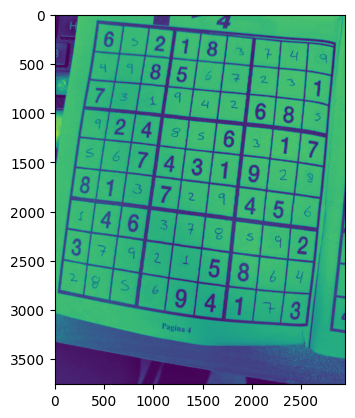

In [184]:
image_total = cv2.imread("../assets/sudoku2.jpg", cv2.IMREAD_GRAYSCALE)
coord_crop = torch.tensor(
    [
        [
            int(box[0] - 0.75 * box[0]),
            int(box[1] - 0.40 * box[1]),
            int(box[2] + 0.40 * box[2]),
            int(box[3] + 0.40 * box[3]),
        ]
        for box in predictions[0].boxes.xyxy
    ]
)

cropped_image = image_total[
    coord_crop[0][1] : coord_crop[0][3], coord_crop[0][0] : coord_crop[0][2]
]
image = cropped_image
plt.imshow(cropped_image)
plt.show()

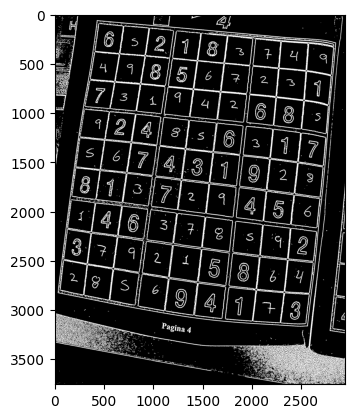

In [191]:
proc = cv2.GaussianBlur(cropped_image.copy(), (9, 9), 0)
# proc = cv2.medianBlur(cropped_image.copy(), 5)

proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
proc = cv2.bitwise_not(proc, proc)  
# kernel = np.ones((3, 3), np.uint8)
kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]],np.uint8)
proc = cv2.erode(proc, kernel, iterations=1)
proc = cv2.dilate(proc, kernel, iterations=2)
proc = cv2.morphologyEx(proc, cv2.MORPH_CLOSE, kernel)
# proc = cv2.bitwise_not(proc, proc)  

plt.imshow(cv2.cvtColor(proc, cv2.COLOR_BGR2RGB))

In [192]:
def order_points_of_quadrilateral(pts):
    """
    Given an array of four points describing a quadrilateral,
    sorts them in the following order:
    (top-left, top-right, bottom-right, bottom-left)
    """
    rect = np.zeros((4, 2), dtype="float32")
    # Summing the x and y coordinates of each point to one value,
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # Computing the difference between the x and y value of each point, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect
def four_point_transform(img, pts):
    """
    Given an array of four points describing a quadrilateral in an
    image, returns a homography matrix that warps this quadrilateral
    into a top-down view
    """
    # Obtain a consistent order of the points and unpack them
    # individually
    rect = order_points_of_quadrilateral(pts)
    (top_left, top_right, bottom_right, bottom_left) = rect

    # Compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(
        ((bottom_right[0] - bottom_left[0]) ** 2)
        + ((bottom_right[1] - bottom_left[1]) ** 2)
    )
    widthB = np.sqrt(
        ((top_right[0] - top_left[0]) ** 2) + ((top_right[1] - top_left[1]) ** 2)
    )
    max_width = min(int(widthA), int(widthB))

    # Compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    height_a = np.sqrt(
        ((top_right[0] - bottom_right[0]) ** 2)
        + ((top_right[1] - bottom_right[1]) ** 2)
    )
    height_b = np.sqrt(
        ((top_left[0] - bottom_left[0]) ** 2) + ((top_left[1] - bottom_left[1]) ** 2)
    )
    max_height = min(int(height_a), int(height_b))

    # Now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array(
        [
            [10, 10],
            [max_width - 10, 10],
            [max_width - 10, max_height - 10],
            [10, max_height - 10],
        ],
        dtype="float32",
    )

    # Compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(img, M, (max_width + 10, max_height + 10))

    return warped, M

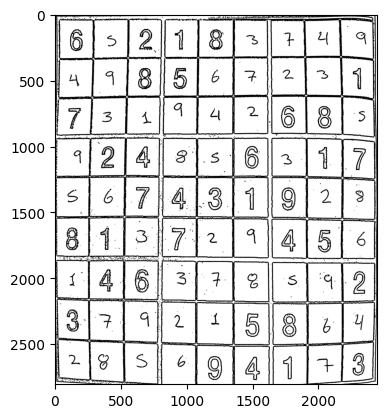

In [196]:
contours = cv2.findContours(proc, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(contours)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:1]
for c in cnts:
    # Approximate the contour in order to determine whether the contour is a quadrilateral
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * peri, True)

    # We are looking for a contour that is roughly a quadrilateral
    if len(approx) == 4:
        warped, M = four_point_transform(
            proc,
            np.array([approx[0][0], approx[1][0], approx[2][0], approx[3][0]]),
        )
        # warped = cv2.dilate(warped, kernel, iterations=2)
        warped = cv2.bitwise_not(warped, warped)
        plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
        plt.show()
        # break
